<a href="https://colab.research.google.com/github/kimchaeyoung-student/pdm04/blob/master/py-pandas/pandas_4_visualizing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [3]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20200928', periods=6)  # 6일의 시간 인덱스를 만들어 냄
dates

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# head()  # 4개의 column 데이터를 랜덤으로 만든다. column의 이름은 ABCD
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-09-28,-0.298991,-1.777047,-0.604324,-0.687710
2020-09-29,-0.186161,0.864879,-0.438397,1.780482
2020-09-30,1.687022,0.828740,0.925260,0.396033
2020-10-01,0.078268,-1.527269,-0.556387,-2.128725
2020-10-02,0.968952,0.562070,0.517247,-1.293787
2020-10-03,2.698543,1.012195,0.912430,-0.641564




---



# 데이터 시각화

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


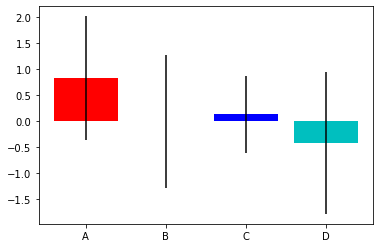

In [6]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')
plt.show()  # 텍스트 설명이 사라지게 함

***

## pandas의 데이터 시각화 (Visualization)

In [7]:
df

,A,B,C,D
2020-09-28,-0.298991,-1.777047,-0.604324,-0.687710
2020-09-29,-0.186161,0.864879,-0.438397,1.780482
2020-09-30,1.687022,0.828740,0.925260,0.396033
2020-10-01,0.078268,-1.527269,-0.556387,-2.128725
2020-10-02,0.968952,0.562070,0.517247,-1.293787
2020-10-03,2.698543,1.012195,0.912430,-0.641564


### 꺽은선 그래프

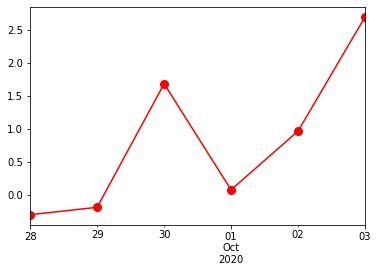

In [8]:
df['A'].plot(marker='o', c='r', ms=8)

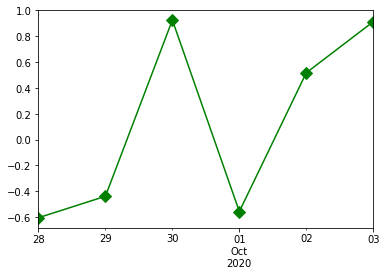

In [9]:
df['C'].plot(marker='D', c='g', ms=8)  # set figsize

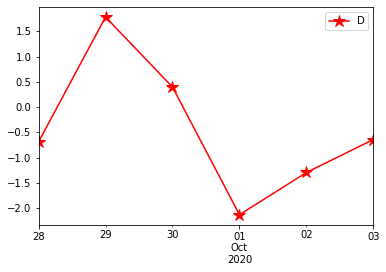

In [10]:
df.plot(y='D', marker='*', c='r', ms=12)   # x-축은 날짜인덱스, y축은 D열 데이터

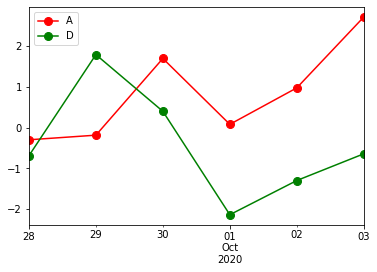

In [14]:
# 두 개의 그래프를 한 축에 그리기

# df['A','D'].plot(marker='o', c='r', ms=8) # 키에러 발생, 리스트로 묶어야 함

df[['A','D']].plot(marker='o', color='rg', ms=8)  # works!, change "color"

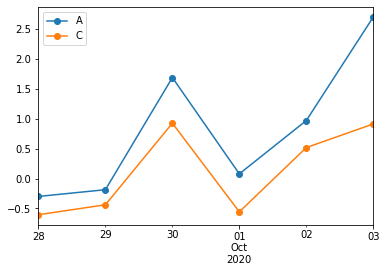

In [15]:
df.plot(y=['A','C'], marker='o')  # color 지정 안하면 자동으로 아래와 같은 color로 출력

### 산포도 (Scatter graph)

In [17]:
df

,A,B,C,D
2020-09-28,-0.298991,-1.777047,-0.604324,-0.687710
2020-09-29,-0.186161,0.864879,-0.438397,1.780482
2020-09-30,1.687022,0.828740,0.925260,0.396033
2020-10-01,0.078268,-1.527269,-0.556387,-2.128725
2020-10-02,0.968952,0.562070,0.517247,-1.293787
2020-10-03,2.698543,1.012195,0.912430,-0.641564


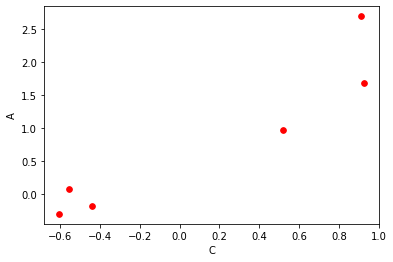

In [16]:
df.plot(kind='scatter',x='C',y='A', color='r', marker='o', s=32)  # x축은 C열, y축은 A열 데이터 (6개)

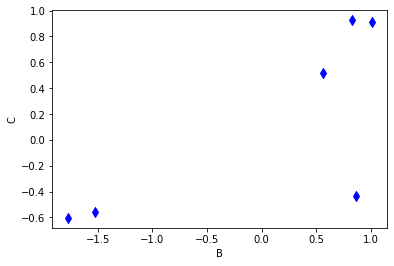

In [18]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  

### 바 그래프

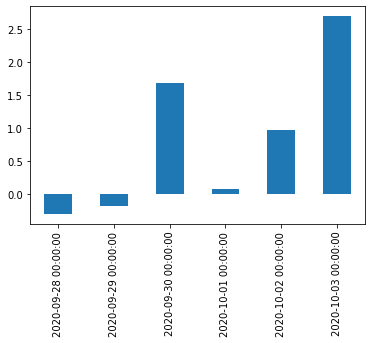

In [19]:
df['A'].plot.bar()  # A열의 바 그래프

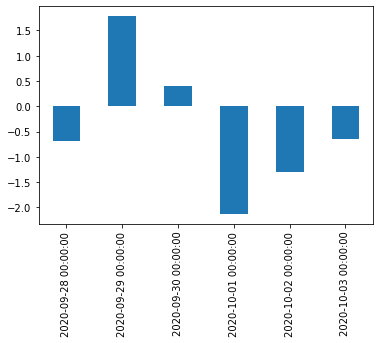

In [20]:
df['D'].plot.bar()

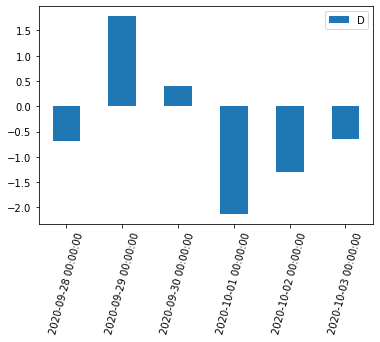

In [22]:
df.plot(kind='bar', y='D', rot=75)  # rot=75 : x축의 label이 75도 각도로 나타남

#### 다중 바그래프

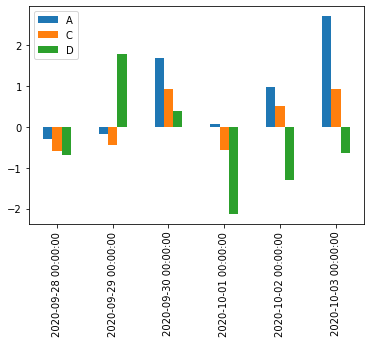

In [23]:
df.plot(kind='bar',y=['A','C','D']) # A, C, D 세개의 데이터에 대한 바 그래프

#### 평균/표준편차 그래프

In [24]:
df.mean(0), df.std(0), df.columns

(A    0.824605
 B   -0.006072
 C    0.125972
 D   -0.429212
 dtype: float64, A    1.193095
 B    1.285730
 C    0.738638
 D    1.364663
 dtype: float64, Index(['A', 'B', 'C', 'D'], dtype='object'))

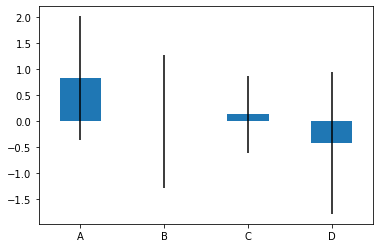

In [26]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0), rot=0)



---



### 그래프 이어 그리기

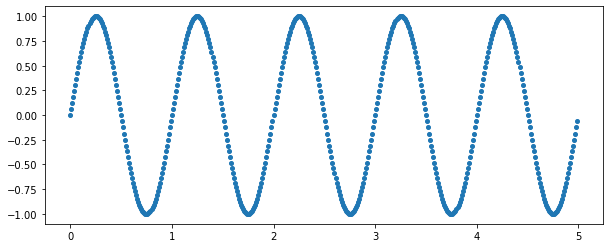

In [27]:
x1 = np.arange(0.0, 5.0, 0.01)
y1 = np.sin(2*np.pi*x1)
plt.figure(figsize=(10,4))  # 크기 지정
plt.plot(x1, y1, 'o', ms = 4)

In [28]:
x1.shape, y1.shape  # 데이터 개수가 같아서 에러 발생 X

((500,), (500,))

#### pandas 데이터프레임을 이용한 그래프 

In [29]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine'])
df.head()

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690


In [30]:
df.tail()

,sine
4.95,-0.309017
4.96,-0.248690
4.97,-0.187381
4.98,-0.125333
4.99,-0.062791


In [31]:
len(df)

500

In [32]:
pre_size = int(len(df) * 0.8) # 앞부분 80%
post_size = len(df) - pre_size  # 뒷부분 20%
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)]
# 인덱스로 데이터 프레임의 일정부분을 잘라내는 방식인 iloc 이용

print(len(pre), len(post))

400 100


In [33]:
post.shape

(100, 1)

In [34]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)
# 뒷부분 20%의 신호에 가우시안 잡음을 같은 크기만큼 넣어준다.

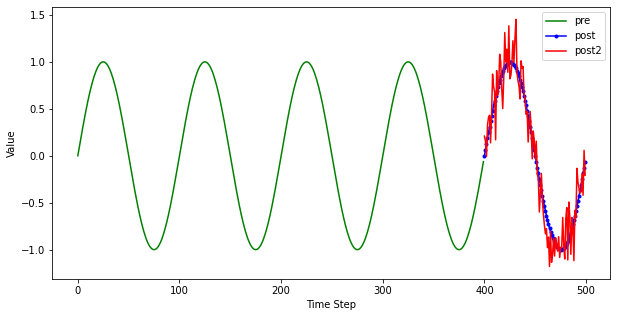

In [35]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre")
# 앞부분 80% 그래프

plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
# 뒷부분 20% 그래프, 잡음 없음

plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
# 뒷부분 20% 그래프, 잡음 있음

plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();
# 데이터 그래프 그리기

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

- subplot 사용

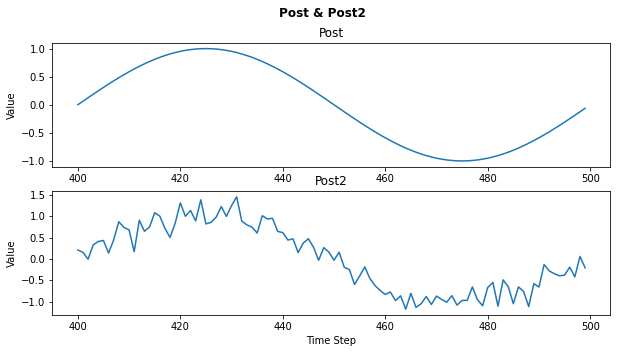

In [43]:
plt.figure(figsize=(10,5))

plt.subplot(211).set_title("Post")  # 첫 번째 subplot 제목
plt.ylabel('Value')                 # y레이블 'Value'
# plt.xlabel('Time Step')           # x레이블 'Time Step'

plt.plot(np.arange(len(pre), len(pre) + len(post)), post, label="post")

plt.subplot(212).set_title("Post2") # 두 번째 subplot 제목
plt.ylabel('Value')                 # y레이블 'Value'
plt.xlabel('Time Step')             # x레이블 'Time Step'

plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, label="post2")

plt.suptitle("Post & Post2", fontweight="bold") # 전체 제목, 글자 굵게
# plt.tight_layout()  # 그래프 간격 조절
plt.show()